# Modeling

### 'How to get a credit on Germany?'

<font color='grey' size=3> Cristian Valeria </font>

## Reading cleaned Data

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lazypredict
import sklearn
import imblearn
import joblib

import warnings
warnings.filterwarnings('ignore')

In [61]:
data = pd.read_csv('../Data/Cleaned/data_cleaned.csv')
data.head()

,age,sex,job,credit_amount,duration,account_balance,credit_history,savings,length_of_current_employment,marital_status,...,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,housing_free,housing_own,housing_rent,y_creditability
0,67,1,2,1169,6,1,4,5,5,3,...,0,0,0,1,0,0,0,1,0,1
1,22,2,2,5951,48,2,2,1,3,2,...,0,0,0,1,0,0,0,1,0,0
2,49,1,1,2096,12,4,4,1,4,3,...,0,1,0,0,0,0,0,1,0,1
3,45,1,2,7882,42,1,2,1,4,3,...,0,0,1,0,0,0,1,0,0,1
4,53,1,2,4870,24,1,3,1,3,3,...,0,0,0,0,0,0,1,0,0,0


In [65]:
cols = []
for col in data.columns:
  cols.append(col.lower().replace(' ', '_'))
data.columns = cols

cols = []
for col in data.columns:
  cols.append(col.lower().replace('/', '_'))
data.columns = cols

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           944 non-null    int64
 1   sex                           944 non-null    int64
 2   job                           944 non-null    int64
 3   credit_amount                 944 non-null    int64
 4   duration                      944 non-null    int64
 5   account_balance               944 non-null    int64
 6   credit_history                944 non-null    int64
 7   savings                       944 non-null    int64
 8   length_of_current_employment  944 non-null    int64
 9   marital_status                944 non-null    int64
 10  guarantors                    944 non-null    int64
 11  property                      944 non-null    int64
 12  concurrent_credits            944 non-null    int64
 13  no_of_credits_at_this_bank    944 n

## Treating class imbalance

In [67]:
X = data.drop(columns='y_creditability')
y = data['y_creditability']

In [68]:
y.value_counts()

1    656
0    288
Name: y_creditability, dtype: int64

In [69]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority") 
X_ros, y_ros = ros.fit_resample(X, y)

In [70]:
y_ros.value_counts()

1    656
0    656
Name: y_creditability, dtype: int64

## Train_Split

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=17)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.columns = X.columns
X_test.columns = X.columns

## Scale

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ros)
X_scaled

X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y_ros, test_size=0.2, random_state=17)

X_train_s = pd.DataFrame(X_train_s)
X_test_s = pd.DataFrame(X_test_s)

X_train_s.columns = X.columns
X_test_s.columns = X.columns

## Models

## a) Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_s, y_train)

y_pred_train = model_lr.predict(X_train_s)
y_pred_test = model_lr.predict(X_test_s)
y_true_train = y_train
y_true_test = y_test

In [74]:
# measure the accuracy 

In [75]:
from sklearn.metrics import r2_score,cohen_kappa_score, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score

def accuracy_tests(model_name, y_pred_train,y_true_train,y_pred_test,y_true_test):
    
   
    kappa_train = cohen_kappa_score(y_true_train, y_pred_train)
    kappa_test = cohen_kappa_score(y_true_test, y_pred_test)
    acc_train = accuracy_score(y_true_train, y_pred_train)
    acc_test = accuracy_score(y_true_test, y_pred_test)
    f1_train = f1_score(y_true_train, y_pred_train)
    f1_test = f1_score(y_true_test, y_pred_test)
    precision_train = precision_score(y_true_train, y_pred_train)
    precision_test = precision_score(y_true_test, y_pred_test)
    recall_train = recall_score(y_true_train, y_pred_train)
    recall_test = recall_score(y_true_test, y_pred_test)
    
    
    df = pd.DataFrame({
    model_name +' Train': [acc_train, f1_train, precision_train , recall_train, kappa_train],
    model_name +' Test': [acc_test, f1_test, precision_test , recall_test, kappa_test ],
    }, index=['ACC', 'F1', 'PRECISION', 'RECALL', 'KAPPA'])
    
    return df

accuracy_tests("LR_1s", y_pred_train,y_true_train,y_pred_test,y_true_test)

,LR_1s Train,LR_1s Test
ACC,0.737846,0.699620
F1,0.738841,0.690196
PRECISION,0.736742,0.709677
RECALL,0.740952,0.671756
KAPPA,0.475688,0.399109


In [76]:
test1_lr = accuracy_tests("LR_1s", y_pred_train,y_true_train,y_pred_test,y_true_test)

## b) Random forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)
y_true_train = y_train
y_true_test = y_test

In [78]:
from sklearn.metrics import r2_score,cohen_kappa_score, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score

accuracy_tests("RF_1", y_pred_train,y_true_train,y_pred_test,y_true_test)

,RF_1 Train,RF_1 Test
ACC,1.0,0.855513
F1,1.0,0.849206
PRECISION,1.0,0.884298
RECALL,1.0,0.816794
KAPPA,1.0,0.710939


In [79]:
test1_rf = accuracy_tests("RF_1", y_pred_train,y_true_train,y_pred_test,y_true_test)

<font color = 'blue' size = 3.5> model is overffited </font>

#### b.1. Searching for the right parameters:

In [189]:
n_estimators = [int(x) for x in range(5,105,5)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in range(2,16,2)]

min_samples_split = [2, 5]

min_samples_leaf = [1, 2]

bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 12, 14], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [190]:
from sklearn.model_selection import GridSearchCV
model_rf_Grid = GridSearchCV(estimator = model_rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [192]:
# model_rf_Grid.fit(X_train, y_train)
# model_rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 14,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 95}

In [80]:
model_rf = RandomForestClassifier(bootstrap= False,
 max_depth= 12,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 random_state=25,
 n_estimators= 95)

model_rf.fit(X_train, y_train)

y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)
y_true_train = y_train
y_true_test = y_test

accuracy_tests("RF_2", y_pred_train,y_true_train,y_pred_test,y_true_test)

,RF_2 Train,RF_2 Test
ACC,0.997140,0.859316
F1,0.997135,0.854902
PRECISION,1.000000,0.879032
RECALL,0.994286,0.832061
KAPPA,0.994280,0.718570


In [81]:
test2_rf = accuracy_tests("RF_2", y_pred_train,y_true_train,y_pred_test,y_true_test)

## c) Extra Trees Classifier
(Extremely Randomized Trees or 'random forest on steroids')

In [82]:
from sklearn.ensemble import ExtraTreesClassifier

In [83]:
model_ext = ExtraTreesClassifier()

model_ext.fit(X_train, y_train)

y_pred_train = model_ext.predict(X_train)
y_pred_test = model_ext.predict(X_test)
y_true_train = y_train
y_true_test = y_test

accuracy_tests("EXT_1", y_pred_train,y_true_train,y_pred_test,y_true_test)

,EXT_1 Train,EXT_1 Test
ACC,1.0,0.878327
F1,1.0,0.878788
PRECISION,1.0,0.872180
RECALL,1.0,0.885496
KAPPA,1.0,0.756665


In [84]:
test1_ext = accuracy_tests("EXT_1", y_pred_train,y_true_train,y_pred_test,y_true_test)

#### c.1. Searching for the right parameters:

In [257]:
#model_rf_Grid = GridSearchCV(estimator = model_ext, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
#model_rf_Grid.fit(X_train, y_train)
#model_rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 55}

In [85]:
model_ext = ExtraTreesClassifier(bootstrap= False,
 max_depth= 12,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 random_state=39,
 n_estimators= 55)

model_ext.fit(X_train, y_train)

y_pred_train = model_ext.predict(X_train)
y_pred_test = model_ext.predict(X_test)
y_true_train = y_train
y_true_test = y_test

accuracy_tests("EXT_2", y_pred_train,y_true_train,y_pred_test,y_true_test)

,EXT_2 Train,EXT_2 Test
ACC,0.989514,0.847909
F1,0.989453,0.846154
PRECISION,0.996139,0.852713
RECALL,0.982857,0.839695
KAPPA,0.979028,0.695796


In [86]:
test2_ext = accuracy_tests("EXT_2", y_pred_train,y_true_train,y_pred_test,y_true_test)

## d) K Neighrest Neighbour Classifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10)

In [88]:
model_knn.fit(X_train, y_train)

y_pred_train = model_knn.predict(X_train)
y_pred_test = model_knn.predict(X_test)
y_true_train = y_train
y_true_test = y_test

accuracy_tests("KNN_1", y_pred_train,y_true_train,y_pred_test,y_true_test)

,KNN_1 Train,KNN_1 Test
ACC,0.693994,0.539924
F1,0.641341,0.415459
PRECISION,0.775676,0.565789
RECALL,0.546667,0.328244
KAPPA,0.388160,0.078369


In [89]:
test1_knn = accuracy_tests("KNN_1", y_pred_train,y_true_train,y_pred_test,y_true_test)

#### d.1. Searching for the right parameters:

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
k=np.random.randint(1,50,60)

params = {'n_neighbors': k}

random_search = RandomizedSearchCV(model_knn,params,n_iter=5,cv=5,n_jobs=-1,verbose=0)
random_search.fit(X_train,y_train)

random_search.best_params_

/Users/cristianvaleria/opt/anaconda3/envs/final_project/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/cristianvaleria/opt/anaconda3/envs/final_project/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/cristianvaleria/opt/anaconda3/envs/final_project/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/cristianvaleria/opt/anaconda3/envs/final_project/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning

{'n_neighbors': 1}

In [91]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred_train = model_knn.predict(X_train)
y_pred_test = model_knn.predict(X_test)
y_true_train = y_train
y_true_test = y_test

test2_knn = accuracy_tests("KNN_2", y_pred_train,y_true_train,y_pred_test,y_true_test)
test2_knn

,KNN_2 Train,KNN_2 Test
ACC,0.776930,0.615970
F1,0.758264,0.562771
PRECISION,0.828442,0.650000
RECALL,0.699048,0.496183
KAPPA,0.553927,0.231239


# Comparing models

In [92]:
pd.concat([test1_lr,test1_rf,test2_rf,test1_ext,test2_ext,test1_knn,test2_knn], axis=1).T.sort_values(by='ACC',ascending=False)

,ACC,F1,PRECISION,RECALL,KAPPA
RF_1 Train,1.000000,1.000000,1.000000,1.000000,1.000000
EXT_1 Train,1.000000,1.000000,1.000000,1.000000,1.000000
RF_2 Train,0.997140,0.997135,1.000000,0.994286,0.994280
EXT_2 Train,0.989514,0.989453,0.996139,0.982857,0.979028
EXT_1 Test,0.878327,0.878788,0.872180,0.885496,0.756665
RF_2 Test,0.859316,0.854902,0.879032,0.832061,0.718570
RF_1 Test,0.855513,0.849206,0.884298,0.816794,0.710939
EXT_2 Test,0.847909,0.846154,0.852713,0.839695,0.695796
KNN_2 Train,0.776930,0.758264,0.828442,0.699048,0.553927
LR_1s Train,0.737846,0.738841,0.736742,0.740952,0.475688


The best model that is not overfitted is Random Forest 2 (with the parameters adjust with GS_CV)

## the choosen model & exporting

In [93]:
model_rf = RandomForestClassifier(bootstrap= False,
 max_depth= 12,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 random_state=25,
 n_estimators= 95)

model_rf.fit(X_train, y_train)

y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)
y_true_train = y_train
y_true_test = y_test

#prob:
y_prob = model_rf.predict_proba(X_test)[:,1]

accuracy_tests("RF_2", y_pred_train,y_true_train,y_pred_test,y_true_test)

,RF_2 Train,RF_2 Test
ACC,0.997140,0.859316
F1,0.997135,0.854902
PRECISION,1.000000,0.879032
RECALL,0.994286,0.832061
KAPPA,0.994280,0.718570


In [94]:
import joblib

In [95]:
joblib.dump(model_rf, '../Models/model_rf_credit.joblib') 

['../Models/model_rf_credit.joblib']

## Graphic of performances

### a. Confusion Matrix

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

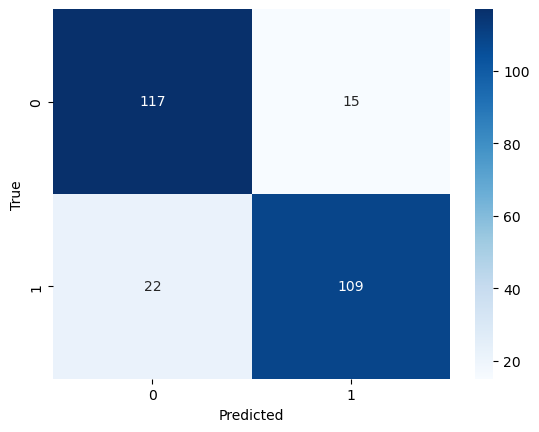

In [97]:
conf_matrix = confusion_matrix(y_true_test, y_pred_test)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### b. ROC curve

In [99]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

In [100]:
roc_auc

0.9419962988665279

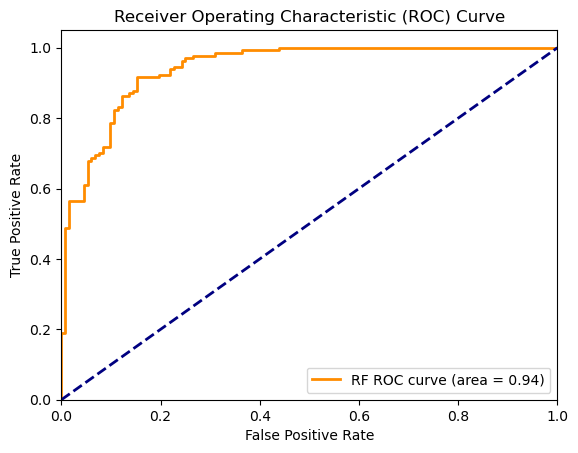

In [101]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Feature Importance

In [102]:
imp = pd.DataFrame(model_rf.feature_importances_, index = data.columns[:28])
imp.rename(columns={0:'importance'},inplace = True)
imp = imp.sort_values(by='importance',ascending=False)
imp['acc_importance'] = imp['importance'].cumsum()
imp

,importance,acc_importance
account_balance,0.153628,0.153628
credit_amount,0.124035,0.277663
age,0.105493,0.383155
duration,0.091974,0.475129
credit_history,0.071424,0.546553
length_of_current_employment,0.055424,0.601977
savings,0.055424,0.657401
property,0.046730,0.704131
job,0.030015,0.734146
guarantors,0.028417,0.762563


In [57]:
X_test.describe()

,age,sex,job,credit_amount,duration,account_balance,credit_history,savings,length_of_current_employment,marital_status,...,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,housing_free,housing_own,housing_rent
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,...,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,34.403042,1.353612,1.916350,3631.193916,21.737643,2.406844,2.524715,1.961977,3.281369,2.627376,...,0.346008,0.007605,0.045627,0.209125,0.235741,0.022814,0.015209,0.102662,0.718631,0.178707
std,11.345255,0.479002,0.688398,3140.918469,13.089664,1.237869,1.054958,1.520370,1.180598,0.734854,...,0.476603,0.087038,0.209073,0.407460,0.425271,0.149594,0.122617,0.304095,0.450524,0.383837
min,20.000000,1.000000,0.000000,362.000000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.500000,1.000000,2.000000,1275.000000,12.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,2.000000,2375.000000,18.000000,2.000000,2.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,41.000000,2.000000,2.000000,4633.000000,30.000000,4.000000,4.000000,3.000000,4.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,74.000000,2.000000,3.000000,15672.000000,72.000000,4.000000,4.000000,5.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
X_test.columns

Index(['age', 'sex', 'job', 'credit_amount', 'duration', 'account_balance',
       'credit_history', 'savings', 'length_of_current_employment',
       'marital_status', 'guarantors', 'property', 'concurrent_credits',
       'no_of_credits_at_this_bank', 'no_of_dependents', 'telephone',
       'foreign_worker', 'purpose_business', 'purpose_car',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/TV', 'purpose_repairs',
       'purpose_vacation/others', 'housing_free', 'housing_own',
       'housing_rent'],
      dtype='object')